In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.378025888850203 -46.312989391017396
-19.083068914090347 127.1331272420025
-81.89204673278856 -65.03903845104705
-65.18956813604937 -132.66572968322276
-39.132690465456996 -96.19030697476292
-28.549530092245057 -123.12948424737792
33.74203857742353 24.900173077851548
56.03946288077296 -118.07726562951882
-64.54528781779149 -74.60159472834373
1.3882329926726698 -16.090279071320737
19.68031674249326 37.64587324077792
67.59971321647421 -92.45777786648493
-75.33326922618916 65.9727272801199
-67.12884996181324 152.36337021309038
82.6617901953498 -74.47051930803711
-2.382236272354035 -73.73170397714124
51.33655399912408 125.1949470892456
-52.764669187661525 124.73503336285046
-1.9643959485209734 77.29532501619394
-48.433505594873736 125.43067083298644
-28.336395571547683 16.994642301181784
46.96970757793878 151.32785457776492
-77.19841365008423 107.89794620717106
-25.677555133403303 111.3692915848286
-23.43388287576869 -19.209824186864097
-57.76146990413261 -24.674301759874055
-12.3351137

-2.222404998872591 -100.52486735103604
38.45990889579801 -116.52732498048476
76.16940517645665 -82.29244548561023
56.70594304297936 -133.42800544131103
10.673017496656215 41.0663176916033
4.403443085619443 -178.0833563461838
-74.57548204610833 -119.27892183142627
-50.09783694797822 160.77101015439865
-1.1341796979999401 67.85326408370514
12.336071400860945 176.66397017309367
72.76269909154547 -25.344460399176626
-3.4789786388405446 123.84095325365121
82.25889150329468 105.94548794109596
28.862027144186627 -19.369246605482346
-77.31101831057612 -18.023637647747478
35.8065967334432 141.1890181266674
-82.11391183136043 -23.442313505437227
-36.82303462802628 147.67412596068937
54.77689102082999 112.10773148836824
-63.058218307169255 147.46785965258454
-51.16118502505497 10.151663177651159
-57.5094013906407 -148.31823153791305
-37.83068786920363 146.11956959707072
-76.98252209251605 3.9909205851800493
-56.6403517667067 -10.184351630086582
34.57552420526713 -69.58736313964243
7.9922140286963

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f16ea47af7203c505dece9b737c933e


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
 #Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto belo
Processing Record 2 of Set 1 | kununurra
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | pombia
Processing Record 7 of Set 1 | fairview
Processing Record 8 of Set 1 | mattru
Processing Record 9 of Set 1 | sawakin
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | iquitos
Processing Record 15 of Set 1 | tahe
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | oranjemund
Processing Record 20 of Set 1 | vostok
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 |

Processing Record 34 of Set 4 | pevek
Processing Record 35 of Set 4 | finschhafen
Processing Record 36 of Set 4 | khani
Processing Record 37 of Set 4 | sorland
Processing Record 38 of Set 4 | storsteinnes
Processing Record 39 of Set 4 | barahona
Processing Record 40 of Set 4 | ulyanovo
City not found. Skipping...
Processing Record 41 of Set 4 | xalpatlahuac
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | marquette
Processing Record 44 of Set 4 | temaraia
City not found. Skipping...
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | fare
Processing Record 47 of Set 4 | berkakit
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | sorvag
City not found. Skipping...
Processing Record 50 of Set 4 | jiroft
City not found. Skipping...
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | georgiyevskoye
Processing Record 4

Processing Record 25 of Set 8 | chifeng
Processing Record 26 of Set 8 | ayr
Processing Record 27 of Set 8 | moche
Processing Record 28 of Set 8 | chumikan
Processing Record 29 of Set 8 | dera din panah
City not found. Skipping...
Processing Record 30 of Set 8 | sembakung
Processing Record 31 of Set 8 | arraial do cabo
Processing Record 32 of Set 8 | okhotsk
Processing Record 33 of Set 8 | kudahuvadhoo
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | clarence town
Processing Record 36 of Set 8 | marawi
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | chegdomyn
Processing Record 39 of Set 8 | broken hill
Processing Record 40 of Set 8 | isiro
Processing Record 41 of Set 8 | sibu
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | gondanglegi
Processing Record 44 of Set 8 | andselv
City not found. Skipping...
Processing Record 45 of Set 8 | ashqelon
Processing Record 46 of Set 8 | mairang
Processing Record 47 of Set 8

Processing Record 12 of Set 12 | tutoia
Processing Record 13 of Set 12 | fomboni
Processing Record 14 of Set 12 | ishigaki
Processing Record 15 of Set 12 | ibirama
Processing Record 16 of Set 12 | opobo
City not found. Skipping...
Processing Record 17 of Set 12 | waipawa
Processing Record 18 of Set 12 | kieta
Processing Record 19 of Set 12 | iqaluit
Processing Record 20 of Set 12 | krasnovishersk
Processing Record 21 of Set 12 | pimentel
Processing Record 22 of Set 12 | pemba
Processing Record 23 of Set 12 | minyar
Processing Record 24 of Set 12 | fayetteville
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | burkhala
City not found. Skipping...
Processing Record 27 of Set 12 | tarakan
Processing Record 28 of Set 12 | riberalta
Processing Record 29 of Set 12 | chitral
Processing Record 30 of Set 12 | poya
Processing Record 31 of Set 12 | manbij
Processing Record 32 of Set 12 | manicore
Processing Record 33 of Set 12 | mariental
Processing Record 34 of Set 12 | sabh

In [12]:
len(city_data)

565

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Belo,-27.1578,-48.5531,78.75,66,0,12.01,BR,2022-11-16 19:36:08
1,Kununurra,-15.7667,128.7333,78.78,83,40,17.27,AU,2022-11-16 19:36:09
2,Ushuaia,-54.8000,-68.3000,56.82,46,75,13.80,AR,2022-11-16 19:34:12
3,Rikitea,-23.1203,-134.9692,74.08,89,100,25.37,PF,2022-11-16 19:34:17
4,Ancud,-41.8697,-73.8203,59.16,76,32,8.19,CL,2022-11-16 19:36:09
5,Pombia,45.6530,8.6336,50.47,92,75,2.30,IT,2022-11-16 19:36:09
6,Fairview,40.8126,-73.9990,51.62,63,75,14.97,US,2022-11-16 19:36:10
7,Mattru,7.6244,-11.8332,74.14,93,54,2.53,SL,2022-11-16 19:36:10
8,Sawakin,19.1059,37.3321,84.81,63,51,5.14,SD,2022-11-16 19:36:11
9,Thompson,55.7435,-97.8558,19.56,93,100,0.00,CA,2022-11-16 19:36:11


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

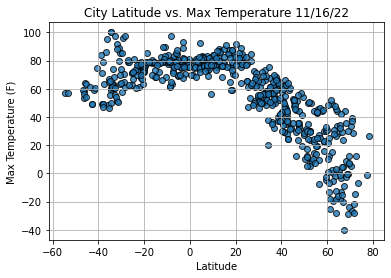

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

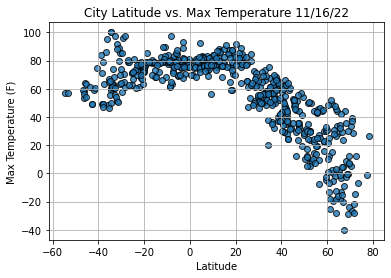

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

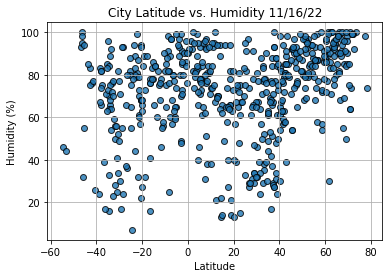

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

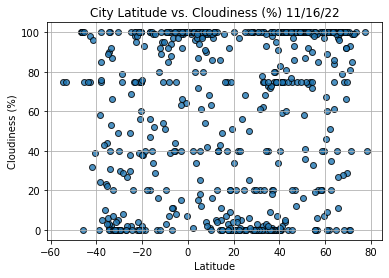

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

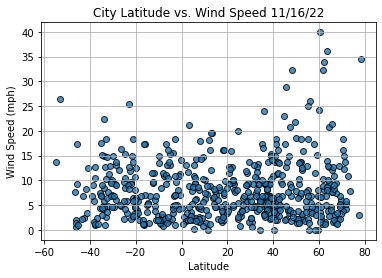

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Pombia,45.6530,8.6336,50.47,92,75,2.30,IT,2022-11-16 19:36:09
6,Fairview,40.8126,-73.9990,51.62,63,75,14.97,US,2022-11-16 19:36:10
7,Mattru,7.6244,-11.8332,74.14,93,54,2.53,SL,2022-11-16 19:36:10
8,Sawakin,19.1059,37.3321,84.81,63,51,5.14,SD,2022-11-16 19:36:11
9,Thompson,55.7435,-97.8558,19.56,93,100,0.00,CA,2022-11-16 19:36:11
...,...,...,...,...,...,...,...,...,...
559,Sheridan,44.8333,-106.9173,36.01,71,100,23.02,US,2022-11-16 19:50:21
560,Balkanabat,39.5108,54.3671,53.56,50,100,14.12,TM,2022-11-16 19:51:05
561,Birobidzhan,48.8000,132.9500,19.31,91,100,2.64,RU,2022-11-16 19:48:52
562,Zheleznodorozhnyy,55.7503,38.0042,25.21,84,19,1.36,RU,2022-11-16 19:51:06


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Pombia,45.6530,8.6336,50.47,92,75,2.30,IT,2022-11-16 19:36:09
6,Fairview,40.8126,-73.9990,51.62,63,75,14.97,US,2022-11-16 19:36:10
7,Mattru,7.6244,-11.8332,74.14,93,54,2.53,SL,2022-11-16 19:36:10
8,Sawakin,19.1059,37.3321,84.81,63,51,5.14,SD,2022-11-16 19:36:11
9,Thompson,55.7435,-97.8558,19.56,93,100,0.00,CA,2022-11-16 19:36:11


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

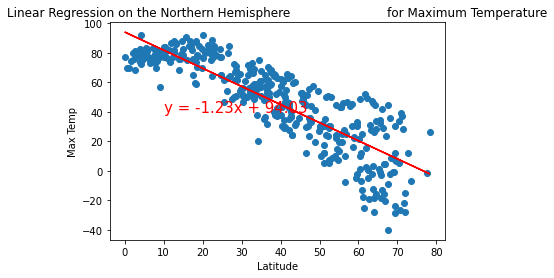

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

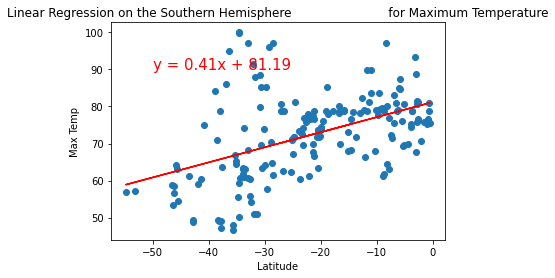

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

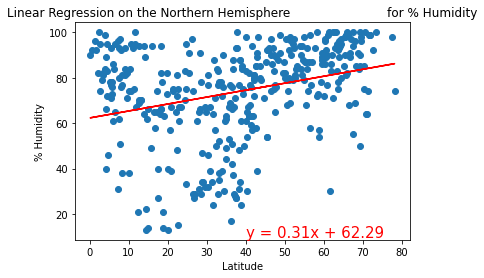

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

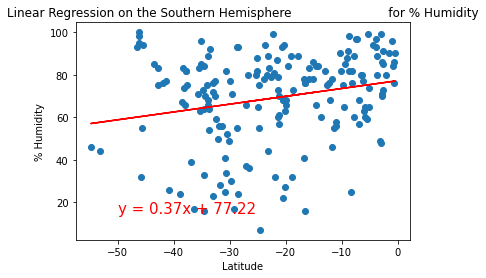

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

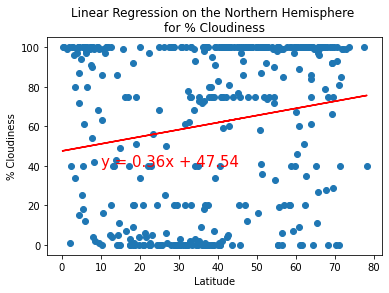

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

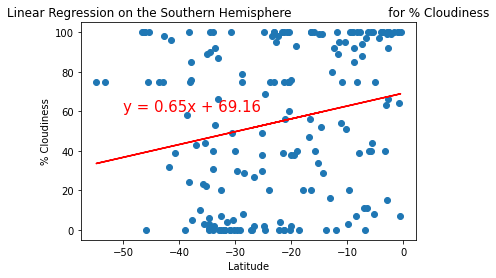

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

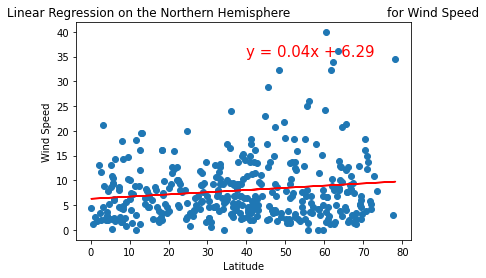

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

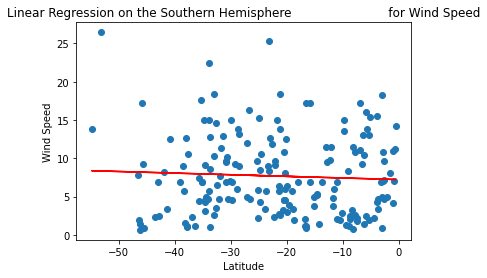

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))